In [1]:
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv("titanic.csv")

In [3]:
data_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
data_df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

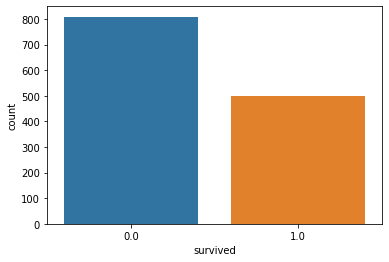

In [6]:
sns.countplot(x=data_df["survived"]);

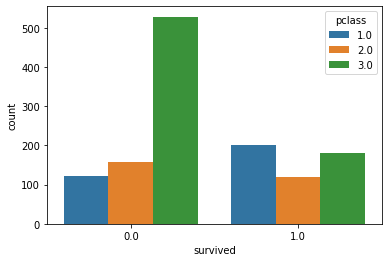

In [7]:
sns.countplot(x=data_df["survived"] , hue = data_df["pclass"]);

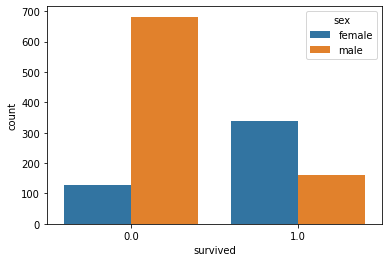

In [8]:
sns.countplot(x=data_df["survived"] , hue = data_df["sex"]);

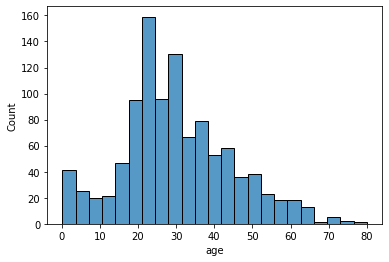

In [9]:
sns.histplot(data_df["age"]);

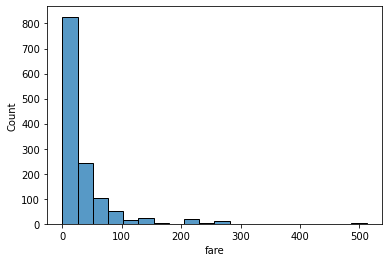

In [10]:
sns.histplot(data_df["fare"] , bins = 20);

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


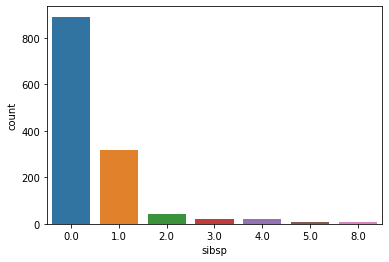

In [11]:
sns.countplot(data_df["sibsp"]);

In [12]:
# We learned dataset.
# Lets preprocessing.

In [13]:
data_df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

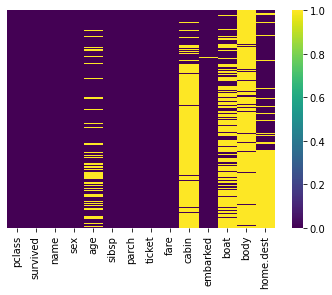

In [14]:
sns.heatmap(data_df.isna() , yticklabels=False  , cmap='viridis');

In [15]:
data_df.drop(["cabin","body","boat","home.dest"] , axis = 1 , inplace=True)

In [16]:
data_df.isna().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [17]:
data_df["age"].fillna(data_df.age.mean(),inplace = True)

In [18]:
data_df.isna().sum()

pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    3
dtype: int64

In [19]:
data_df.dropna(inplace=True)

In [20]:
data_df.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [21]:
sex = pd.get_dummies(data_df["sex"] , drop_first=True)

In [22]:
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [23]:
data_df.embarked.value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

In [24]:
embarked = pd.get_dummies(data_df.embarked , drop_first=True)

In [25]:
pclass = pd.get_dummies(data_df.pclass , drop_first=True)

In [26]:
data_df.drop(["sex","embarked","pclass"], axis = 1 , inplace=True)

In [27]:
data_df = pd.concat([data_df,sex,embarked,pclass] , axis = 1)

In [28]:
data_df.dtypes

survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male          uint8
Q             uint8
S             uint8
2.0           uint8
3.0           uint8
dtype: object

In [29]:
data_df.drop(["name","ticket"] , axis = 1 , inplace=True)

In [30]:
data_df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [31]:
data_df.rename(columns={2.0 : 'embarked' , 3.0 : 'pclass'} , inplace=True , errors='raise')

In [32]:
X = data_df.drop("survived" , axis = 1)
y = data_df["survived"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=100)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lgR = LogisticRegression(max_iter = 1000)

In [37]:
lgR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
lgR.score(X_test,y_test)

0.8103975535168195

In [41]:
lgR.score(X_train,y_train)

0.7865168539325843

In [42]:
lgR_2 = LogisticRegression(C=0.1,max_iter = 1000)
lgR_2.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [43]:
lgR_2.score(X_test,y_test)

0.8073394495412844

In [44]:
lgR_2.score(X_train,y_train)

0.7946884576098059

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
guess = lgR.predict(X_test)

In [47]:
confusion_matrix(y_test,guess)

array([[178,  27],
       [ 35,  87]], dtype=int64)

In [48]:
data_df.head()

,survived,age,sibsp,parch,fare,male,Q,S,embarked,pclass
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [50]:
new_data = np.array([[26,3,0,215,1,0,1,0,0]])
lgR.predict(new_data) # I'm dead :(

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [51]:
lgR.coef_

array([[-3.33164549e-02, -2.96677933e-01, -3.14206164e-02,
         1.88074420e-03, -2.33249270e+00, -4.73337859e-01,
        -5.31513162e-01, -9.52416579e-01, -1.79414204e+00]])

In [52]:
lgR.intercept_

array([3.5914709])

In [ ]:
# Done.